# Importing of classes #

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from IPython.display import display
import joblib
from sklearn import ensemble
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.

# Data Exploration and Reading # 
The data is about predicting the price of the flight tickets. The data is given in the form of a csv file. The data is read using the pandas library. The data is then explored to get a better understanding of the data.

### Importing the dataset 

In [3]:
data = pd.read_csv('Data/heart_data.csv')
print(data)

       index     id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  \
0          0      0  18393       2     168    62.0    110     80            1   
1          1      1  20228       1     156    85.0    140     90            3   
2          2      2  18857       1     165    64.0    130     70            3   
3          3      3  17623       2     169    82.0    150    100            1   
4          4      4  17474       1     156    56.0    100     60            1   
...      ...    ...    ...     ...     ...     ...    ...    ...          ...   
69995  69995  99993  19240       2     168    76.0    120     80            1   
69996  69996  99995  22601       1     158   126.0    140     90            2   
69997  69997  99996  19066       2     183   105.0    180     90            3   
69998  69998  99998  22431       1     163    72.0    135     80            1   
69999  69999  99999  20540       1     170    72.0    120     80            2   

       gluc  smoke  alco  a

### Dataset cleaning
- Assumption:
     - Based off my knowledge, it can be seen that index and id can be deleted as these 2 columns are just 2 unique identifiers and does not affect the learning process

In [4]:
#Remove the Unnamed: 0 column from the dataset
del data['index']
del data['id']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


#### Checking for Missing Data

In [5]:
data.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Converting Age
- Assumption:
    - The integer value in age is considered as the number of days they are alive from birth.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
df = pd.DataFrame(data)
df['age'] = df['age'] / 365
df['age'] = df['age'].astype(int)

In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


### Data Cleaning Conclusion
The dataset is overall really clean with no missing data. However, the value of age is not suited to do training. Hence, there is a need\
to change the value of age into a integer that is rounded up.



## Data Exploration
The data exploration is done to get a better understanding of the data. The data is explored using the plotlib library. The data is explored using the following methods:
- Histogram
- Scatter plot
- Box plot


##### Histogram of the age

(array([4.0000e+00, 0.0000e+00, 1.7800e+03, 4.9430e+03, 7.2570e+03,
        7.4250e+03, 1.3731e+04, 1.1139e+04, 1.3871e+04, 9.8500e+03]),
 array([29. , 32.5, 36. , 39.5, 43. , 46.5, 50. , 53.5, 57. , 60.5, 64. ]),
 <BarContainer object of 10 artists>)

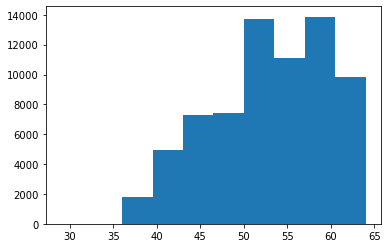

In [9]:
plt.hist(df['age'], bins=10)

#### Histogram conclusion
To conclude, the age of 50-55 and around 58-60 are the highest frequency in the dataset.

#### Scatter Plot of Ap_hi and Ap_lo with the Cardio as value

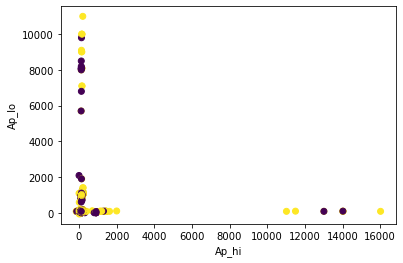

In [14]:
plt.scatter(df['ap_hi'], df['ap_lo'], c = df['cardio'])
plt.xlabel('Ap_hi')
plt.ylabel('Ap_lo')
plt.show()

#### Scatter Plot Conclusion
Through the scatter plot, it can be seen that at lower Ap_hi and Ap_lo has relationship with cardio which is the heart diease.

#### Histogram of Price

In [1]:
histogram = data.hist(column='price', bins=10, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

NameError: name 'data' is not defined

#### Histogram Conclusion
The histogram shows that there is a high frequency of the price of the ticket being between 0 and 10000. This maybe because of the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.

#### Bar Graph of Airline Column against Price

In [17]:
plt.bar(data['airline'], data['price'])
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

#### Bar Graph Conclusion
The bar graph shows that Air_India has the highest price cost of the ticket. This could be due to the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.

#### Box Plot Grouped by Airline and Price

<AxesSubplot: title={'center': 'price'}, xlabel='airline'>

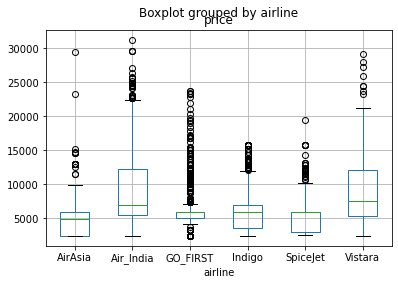

In [10]:
data.boxplot(column='price', by='airline')

#### Box Plot Conclusion
The box plot shows that the price of the ticket is related to the type of Airline. This maybe because of the Airline company charging the prices of the flight. Hence, affecting the cost of the price of the ticket.
> From the mean of the prices seen in the box plot, it can be seen that the airline Vistara has the highest cost of plane tickets

#### Multivariate Plot 

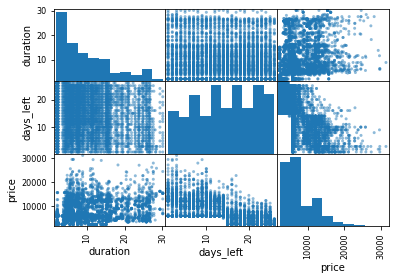

In [11]:
pd.plotting.scatter_matrix(new_data)
plt.show()

# Feature Engineering #
This feature engineering is before feature selection, so all features will be one hot encoded.\
The feature engineering is done to get a better understanding of the data and see which feature is needed.\
The feature engineering is done using the following methods:
- One Hot Encoding

### One-hot encoding of columns
- Assumption:
     - The columns Source, Destination, and Airline are categorical columns.
     - The columns Source, Destination, and Airline need to be converted into numerical columns.
     - The columns Source, Destination, and Airline are converted into numerical columns using one-hot encoding.

In [12]:
features_df = pd.get_dummies(new_data)
features_df.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Delhi,...,stops_two_or_more,stops_zero,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Mumbai,class_Economy
0,2.17,1,5953,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,1,1
1,2.33,1,5953,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,1
2,2.17,1,5956,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,1
3,2.25,1,5955,0,0,0,0,0,1,1,...,0,1,1,0,0,0,0,0,1,1
4,2.33,1,5955,0,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,1,1


Deleted the price column due to it being the column being predicted.

In [14]:
del features_df['price']
features_df.head()

KeyError: 'price'

### Splitting the data into train and test data

Assumption:
The train_size of the code should be 70% of the code. This is to allow more data to be trained into the model.

In [15]:
#Splits the new data into training and testing sets
X = features_df.values
y = new_data['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)

### Feature Engineering Conclusion
The reason for one hot encoding all the features is due to the fact that the model needs to be able to understand the data. The model needs to be able to understand the data by converting the categorical data into numerical data. This is done by one hot encoding the categorical data into numerical data. Afterwards, feature selection will be done after the data has gone through a gradient boosting regressor. This is to ensure that the data is not overfitting. 

### Grid Search
This is to find out which parameters would work best with the Gradient Boosting Regressor
 - Assumption:
     - The param_grids are set to test these fields for the hyper parameters of gradient boosting

In [21]:
param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['absolute_error', 'huber', 'squared_error']
}

# Create the model
model = ()

# Define the grid search we want to run. Run it with all cpus in parallel.
hgs_cv = HalvingGridSearchCV(model, param_grid, n_jobs=-1, verbose=100)
hgs_cv.fit(X_train, y_train)

# Print the parameters that gave us the best result!
print(hgs_cv.best_params_)

n_iterations: 6
n_required_iterations: 7
n_possible_iterations: 6
min_resources_: 10
max_resources_: 3500
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 864
n_resources: 10
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
----------
iter: 1
n_candidates: 288
n_resources: 30
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 2
n_candidates: 96
n_resources: 90
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 32
n_resources: 270
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 4
n_candidates: 11
n_resources: 810
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 4
n_resources: 2430
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 6, 'max_features': 0.1, 'min_samples_leaf': 9, 'n_estimators': 500}


# Feature Selection

### Gradient Boosting Regressor
This is to find out which parameters would work best with the Gradient Boosting Regressor
 - The Gradient Boosting Regressor is used to find out which features are important.
 - The hyper parameters are set to the best parameters found from the grid search.

In [16]:
model = ensemble.GradientBoostingRegressor(learning_rate=0.1, loss='squared_error', max_depth=6, max_features=0.1, min_samples_leaf=9, n_estimators=5000, random_state=7)
model.fit(X_train, y_train)
joblib.dump(model, 'Model/flight_price_model_gradient.pkl')

['Model/flight_price_model_gradient.pkl']

#### Choosing the best features from the Gradient Boosting Regressor
Any features that are under 0.1 are removed from the dataset.

In [17]:
model = joblib.load('Model/flight_price_model_gradient.pkl')
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(features_df.columns[index], (importance[index] * 100.0)))

class_Economy - 0.00%
destination_city_Mumbai - 0.00%
source_city_Delhi - 0.00%
departure_time_Late_Night - 0.11%
stops_two_or_more - 0.17%
arrival_time_Afternoon - 0.37%
departure_time_Night - 0.43%
departure_time_Afternoon - 0.51%
departure_time_Evening - 0.56%
airline_SpiceJet - 0.57%
arrival_time_Late_Night - 0.59%
departure_time_Early_Morning - 0.59%
arrival_time_Early_Morning - 0.70%
arrival_time_Morning - 0.76%
arrival_time_Evening - 0.84%
airline_GO_FIRST - 0.91%
airline_AirAsia - 0.94%
arrival_time_Night - 1.01%
departure_time_Morning - 1.17%
airline_Indigo - 1.44%
airline_Vistara - 1.92%
stops_one - 2.24%
airline_Air_India - 3.51%
stops_zero - 10.57%
duration - 16.81%
days_left - 53.28%


#### Feature Selection Conclusion
The reason for choosing the best features from the Gradient Boosting Regressor is due to the fact that the model needs to be able to understand the data. The model needs to be able to understand the data by converting the categorical data into numerical data. This is done by one hot encoding the categorical data into numerical data. Afterwards, feature selection will be done after the data has gone through a gradient boosting regressor. This is to ensure that the data is not overfitting.\
Through looking at the percentage of the features, it can be seen that the features of airline, stops, duration and days_left affects the price of the ticket the most. This is because the percentage of the features is the highest. Hence, the features of airline, stops, duration and days_left are the most important features.\
The features that can be removed:
- source_city
- class


#### Removing the features that are not important
- Assumption:
    - The features that have a total percentage less than 0.1% will be removed from the dataset.
    - Reason:
        - The features that have a percentage less than 0.1% will be removed from the dataset as they are not important to the model.
    - Price column is the column that we are predicting.

In [18]:
del data['source_city']
del data['class']

data.head()

,airline,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,SpiceJet,Evening,zero,Night,Mumbai,2.17,1,5953
1,SpiceJet,Early_Morning,zero,Morning,Mumbai,2.33,1,5953
2,AirAsia,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956
3,Vistara,Morning,zero,Afternoon,Mumbai,2.25,1,5955
4,Vistara,Morning,zero,Morning,Mumbai,2.33,1,5955


#### Retraining the model
- Assumption:
    - The model needs to be retrained to ensure that the model is not overfitting.

#### Feature Engineering the new dataset

In [19]:
new_features_df = pd.get_dummies(data)

#### Split the new data without the features

In [20]:
X = new_features_df.values
y = data['price'].values
del new_features_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=7)